In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [4]:
def theta(n):
    theta = 2*np.pi*np.linspace(0, 1, n, endpoint = True)
    return theta

In [5]:
def coord(_theta):
    x = np.cos(_theta)
    y = np.sin(_theta)
    return x,y

In [6]:
def normal(x0, y0, x1, y1):
    xm = 0.5*(x0+x1)
    ym = 0.5*(y0+y1)
    x2 = xm + .5*(y1-y0)
    y2 = ym - .5*(x1-x0)
    return xm,ym, x2, y2

In [7]:
def patch(i, _theta):
    dtheta = 2*np.pi/len(_theta)
    theta1 = np.linspace(_theta[i], _theta[i+1], 1000, endpoint= True);
    x = np.cos(theta1)
    y = np.sin(theta1)
    return x,y

In [8]:
th = theta(8)
x,y = coord(th)
xp, yp = patch (0, th)
a,b,c,d = normal (x[0],y[0], x[1], y[1])

In [9]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")

pl1 = ax1.plot([x[0],x[1]], [y[0],y[1]], linewidth = 2., label = r"$patch $", color = 'green')
pl1 = ax1.plot(x, y, linewidth = .5, label = r"$patch $", color = 'green')
pl1 = ax1.plot(xp, yp, linewidth = 0.7, label = r"$patch $", color = 'b')
pl1 = ax1.plot(x, y, linestyle = 'none',marker = 'o', markersize = 5, label = r"$patch$", color = 'r')
#pl1 = ax1.plot([a,c], [b,d], linewidth = 1. , label = r"$patch$", color = 'black')
ax1.arrow(a, b, c-a, d-b, 
          head_width = 0.1, fill = False)

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")
ax1.axis('off')
#ax1.legend(loc = "upper right")
plt.axis('equal')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("simplex2D.eps")
plt.savefig("simplex2D.png")


plt.show()

<IPython.core.display.Javascript object>

In [10]:
A = [[0.50000000000000,0.45000000000000,0.50000000000000,0.55000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.55000000000000],
    [0.50000000000000,0.45000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.45000000000000,0.55000000000000,0.50000000000000,0.50000000000000],
    [0.45000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.45000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.55000000000000],
    [0.45000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.45000000000000,0.50000000000000,0.45000000000000,0.50000000000000],
    [0.50000000000000,0.55000000000000,0.50000000000000,0.45000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.55000000000000],
    [0.50000000000000,0.55000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.45000000000000,0.45000000000000,0.50000000000000,0.50000000000000],
    [0.55000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.55000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.55000000000000],
    [0.55000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.50000000000000,0.45000000000000,0.50000000000000,0.55000000000000,0.50000000000000]]

In [11]:
A

[[0.5, 0.45, 0.5, 0.55, 0.5, 0.5, 0.5, 0.5, 0.55],
 [0.5, 0.45, 0.5, 0.5, 0.5, 0.45, 0.55, 0.5, 0.5],
 [0.45, 0.5, 0.5, 0.5, 0.45, 0.5, 0.5, 0.5, 0.55],
 [0.45, 0.5, 0.5, 0.5, 0.5, 0.45, 0.5, 0.45, 0.5],
 [0.5, 0.55, 0.5, 0.45, 0.5, 0.5, 0.5, 0.5, 0.55],
 [0.5, 0.55, 0.5, 0.5, 0.5, 0.45, 0.45, 0.5, 0.5],
 [0.55, 0.5, 0.5, 0.5, 0.55, 0.5, 0.5, 0.5, 0.55],
 [0.55, 0.5, 0.5, 0.5, 0.5, 0.45, 0.5, 0.55, 0.5]]

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import chain


def centroid(t):
    c = [0.,0., 0.];
    for i in range(3):
        for j in range(3):
            c[i] += t[j][i];
        c[i] /= 3.
    return c

def normal3(t):
    n = centroid(t)
    for i in range(3):
        n[i] -= 0.5
    return n

def map3(p):
    p2 = p
    for i in range(3):
        p2[i] -= 0.5
    pp = np.sqrt(p[0]*p[0] + p[1]*p[1] + p[2]*p[2])
    for i in range(3):
        p2[i] = 0.5  +  p2[i]* 0.05/pp
    return p2
        
def mapt(t):
    t2 = np.zeros(np.shape(t))
    for i in range(3):
        t2[i] = map3(t[i])
    return (t2)

def divide1(t):
    tris = []
    for i in range(4):
        tris.append(np.copy(t))
    a = t[0]
    b = t[1]
    c = t[2]
    a2 = 0.5*(a+b)
    b2 = 0.5*(b+c)
    c2 = 0.5*(c+a)
    tris[0][1] = a2
    tris[0][2] = c2
    tris[1][0] = a2;
    tris[1][2] = b2;
    tris[2][0] = b2;
    tris[2][1] = c2;
    tris[3][0] = a2;
    tris[3][1] = b2
    tris[3][2] = c2;
    return tris

def divide(t, n):
    tris0 = [t]
    for i in range(n):
        tris = []
        for j in range(len(tris0)):
            _tris = divide1(tris0[j])
            for k in range(4):
                tris.append(_tris[k])
        tris0 = tris
    for i in range(len(tris0)):
        tris0[i] = mapt(tris0[i])
    return tris0

        

In [13]:
%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 10

# ne x 3 x 3
triangles = []
for j in range(len(A)):
    triangles.append(np.reshape(A[j], (3,3)))

tris_points = list(chain.from_iterable(triangles))
x, y, z = zip(*tris_points)
tris_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangles))]
ax = plt.figure().gca(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tris_idx, linewidth=1,  edgecolor='green', color = 'green',
                antialiased=False, shade=True, alpha = 0.1)


#just one of the triangles
I = 2
#triangle = [triangles[I]]
triangle = [mapt(triangles[I])]
tri_points = list(chain.from_iterable(triangle))
x1, y1, z1 = zip(*tri_points)
tri_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangle))]
ax.plot_trisurf(x1, y1, z1, triangles=tri_idx, linewidth=1,  edgecolor='green', color = 'green',
                antialiased=False, shade=True, alpha = 0.9)

for i in range(8):
    ce = centroid (triangles[i])
    no = normal3 (triangles[i])
    ax.quiver(ce[0], ce[1], ce[2], 1.2*no[0], 1.2*no[1], 1.2*no[2], color = 'black')



triangle = divide(triangles[I], 6)
tri_points = list(chain.from_iterable(triangle))
x1, y1, z1 = zip(*tri_points)
tri_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangle))]
ax.plot_trisurf(x1, y1, z1, triangles=tri_idx,  color = 'blue',
                antialiased=False, shade=True, alpha = 0.05)

ax.scatter(x,y,z, color = 'red')
ax.axis('off')
plt.show()     


#plt.savefig("simplex3D.eps",bbox_inches='tight')
plt.savefig("simplex3D.png", bbox_inches='tight', dpi = 1200)

    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


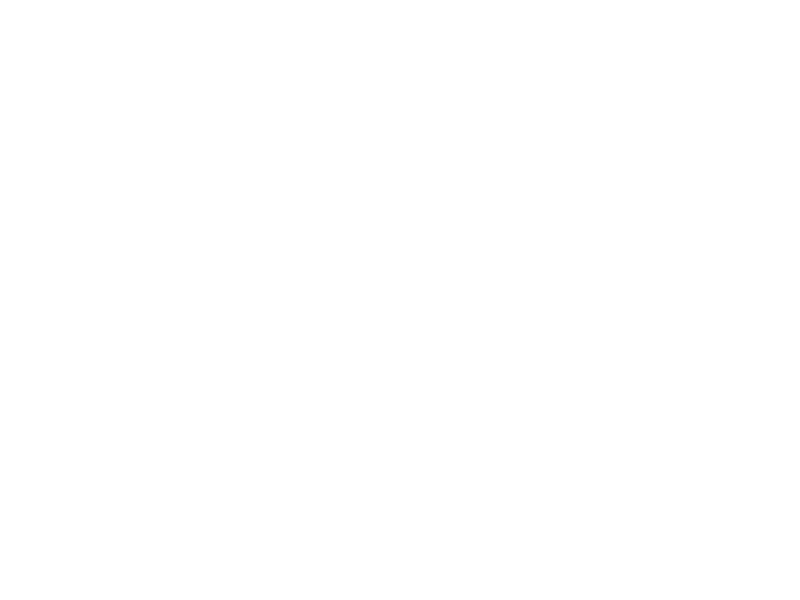

In [14]:
%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 10
ax = plt.gca(projection="3d")


triangle = divide(triangles[I], 3)
tri_points = list(chain.from_iterable(triangle))
x1, y1, z1 = zip(*tri_points)
tri_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangle))]
ax.plot_trisurf(x1, y1, z1, triangles=tri_idx,  color = 'blue',
                antialiased=False, shade=True, alpha = 0.9)

ax.scatter(x,y,z, color = 'red')
ax.axis('off')
plt.show()     


In [15]:
centroid(triangle[0])
normal3(triangle[0])
mapt(triangle[0])
#triangle[0]


array([[0.45      , 0.5       , 0.5       ],
       [0.45050253, 0.49292893, 0.5       ],
       [0.45050253, 0.5       , 0.50707107]])

In [16]:
triangle

[array([[0.45      , 0.5       , 0.5       ],
        [0.45050253, 0.49292893, 0.5       ],
        [0.45050253, 0.5       , 0.50707107]]),
 array([[0.45050253, 0.49292893, 0.5       ],
        [0.45256584, 0.48418861, 0.5       ],
        [0.45133357, 0.49188893, 0.50811107]]),
 array([[0.45133357, 0.49188893, 0.50811107],
        [0.45050253, 0.5       , 0.50707107],
        [0.45256584, 0.5       , 0.51581139]]),
 array([[0.45050253, 0.49292893, 0.5       ],
        [0.45133357, 0.49188893, 0.50811107],
        [0.45050253, 0.5       , 0.50707107]]),
 array([[0.45256584, 0.48418861, 0.5       ],
        [0.45712535, 0.47427521, 0.5       ],
        [0.45435645, 0.48174258, 0.50912871]]),
 array([[0.45712535, 0.47427521, 0.5       ],
        [0.46464466, 0.46464466, 0.5       ],
        [0.46077677, 0.47058258, 0.50980581]]),
 array([[0.46077677, 0.47058258, 0.50980581],
        [0.45435645, 0.48174258, 0.50912871],
        [0.45917517, 0.47958759, 0.52041241]]),
 array([[0.45712535,

In [17]:
# ne x 3 x 3
triangles = []
for j in range(len(A)):
    triangles.append(np.reshape(A[j], (3,3)))

# ax.add_collection(Poly3DCollection(triangles)
# Convert the list of triangles into a "flat" list of points
tri_points = list(chain.from_iterable(triangles))

# Get the X, Y and Z coordinates of each point
x, y, z = zip(*tri_points)

In [18]:
B  =[[0.556568542494924,0.443431457505076,0.500000000000000,0.580000000000000,0.500000000000000,0.500000000000000,0.556568542494924,0.500000000000000,0.556568542494924],
    [0.556568542494924,0.443431457505076,0.500000000000000,0.556568542494924,0.500000000000000,0.443431457505076,0.580000000000000,0.500000000000000,0.500000000000000],
    [0.500000000000000,0.443431457505076,0.443431457505076,0.556568542494924,0.500000000000000,0.443431457505076,0.556568542494924,0.443431457505076,0.500000000000000],
    [0.500000000000000,0.443431457505076,0.443431457505076,0.500000000000000,0.500000000000000,0.420000000000000,0.556568542494924,0.500000000000000,0.443431457505076],
    [0.500000000000000,0.443431457505076,0.556568542494924,0.556568542494924,0.500000000000000,0.556568542494924,0.500000000000000,0.500000000000000,0.580000000000000],
    [0.500000000000000,0.443431457505076,0.556568542494924,0.556568542494924,0.443431457505076,0.500000000000000,0.556568542494924,0.500000000000000,0.556568542494924],
    [0.500000000000000,0.420000000000000,0.500000000000000,0.556568542494924,0.443431457505076,0.500000000000000,0.500000000000000,0.443431457505076,0.556568542494924],
    [0.500000000000000,0.420000000000000,0.500000000000000,0.500000000000000,0.443431457505076,0.443431457505076,0.556568542494924,0.443431457505076,0.500000000000000],
    [0.443431457505076,0.443431457505076,0.500000000000000,0.500000000000000,0.420000000000000,0.500000000000000,0.500000000000000,0.443431457505076,0.556568542494924],
    [0.443431457505076,0.443431457505076,0.500000000000000,0.500000000000000,0.443431457505076,0.443431457505076,0.500000000000000,0.420000000000000,0.500000000000000],
    [0.443431457505076,0.500000000000000,0.443431457505076,0.500000000000000,0.443431457505076,0.443431457505076,0.443431457505076,0.443431457505076,0.500000000000000],
    [0.443431457505076,0.500000000000000,0.443431457505076,0.500000000000000,0.500000000000000,0.420000000000000,0.500000000000000,0.443431457505076,0.443431457505076],
    [0.443431457505076,0.500000000000000,0.556568542494924,0.500000000000000,0.443431457505076,0.556568542494924,0.500000000000000,0.500000000000000,0.580000000000000],
    [0.443431457505076,0.500000000000000,0.556568542494924,0.443431457505076,0.443431457505076,0.500000000000000,0.500000000000000,0.443431457505076,0.556568542494924],
    [0.420000000000000,0.500000000000000,0.500000000000000,0.443431457505076,0.443431457505076,0.500000000000000,0.443431457505076,0.500000000000000,0.556568542494924],
    [0.420000000000000,0.500000000000000,0.500000000000000,0.443431457505076,0.500000000000000,0.443431457505076,0.443431457505076,0.443431457505076,0.500000000000000],
    [0.443431457505076,0.556568542494924,0.500000000000000,0.420000000000000,0.500000000000000,0.500000000000000,0.443431457505076,0.500000000000000,0.556568542494924],
    [0.443431457505076,0.556568542494924,0.500000000000000,0.443431457505076,0.500000000000000,0.443431457505076,0.420000000000000,0.500000000000000,0.500000000000000],
    [0.500000000000000,0.556568542494924,0.443431457505076,0.443431457505076,0.500000000000000,0.443431457505076,0.443431457505076,0.556568542494924,0.500000000000000],
    [0.500000000000000,0.556568542494924,0.443431457505076,0.500000000000000,0.500000000000000,0.420000000000000,0.443431457505076,0.500000000000000,0.443431457505076],
    [0.500000000000000,0.556568542494924,0.556568542494924,0.443431457505076,0.500000000000000,0.556568542494924,0.500000000000000,0.500000000000000,0.580000000000000],
    [0.500000000000000,0.556568542494924,0.556568542494924,0.443431457505076,0.556568542494924,0.500000000000000,0.443431457505076,0.500000000000000,0.556568542494924],
    [0.500000000000000,0.580000000000000,0.500000000000000,0.443431457505076,0.556568542494924,0.500000000000000,0.500000000000000,0.556568542494924,0.556568542494924],
    [0.500000000000000,0.580000000000000,0.500000000000000,0.500000000000000,0.556568542494924,0.443431457505076,0.443431457505076,0.556568542494924,0.500000000000000],
    [0.556568542494924,0.556568542494924,0.500000000000000,0.500000000000000,0.580000000000000,0.500000000000000,0.500000000000000,0.556568542494924,0.556568542494924],
    [0.556568542494924,0.556568542494924,0.500000000000000,0.500000000000000,0.556568542494924,0.443431457505076,0.500000000000000,0.580000000000000,0.500000000000000],
    [0.556568542494924,0.500000000000000,0.443431457505076,0.500000000000000,0.556568542494924,0.443431457505076,0.556568542494924,0.556568542494924,0.500000000000000],
    [0.556568542494924,0.500000000000000,0.443431457505076,0.500000000000000,0.500000000000000,0.420000000000000,0.500000000000000,0.556568542494924,0.443431457505076],
    [0.556568542494924,0.500000000000000,0.556568542494924,0.500000000000000,0.556568542494924,0.556568542494924,0.500000000000000,0.500000000000000,0.580000000000000],
    [0.556568542494924,0.500000000000000,0.556568542494924,0.556568542494924,0.556568542494924,0.500000000000000,0.500000000000000,0.556568542494924,0.556568542494924],
    [0.580000000000000,0.500000000000000,0.500000000000000,0.556568542494924,0.556568542494924,0.500000000000000,0.556568542494924,0.500000000000000,0.556568542494924],
    [0.580000000000000,0.500000000000000,0.500000000000000,0.556568542494924,0.500000000000000,0.443431457505076,0.556568542494924,0.556568542494924,0.500000000000000]]

In [19]:
%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 10
ax = plt.gca(projection="3d")

# ne x 3 x 3
triangles = []
for j in range(len(B)):
    triangles.append(np.reshape(B[j], (3,3)))


# ax.add_collection(Poly3DCollection(triangles)
# Convert the list of triangles into a "flat" list of points
tri_points = list(chain.from_iterable(triangles))

# Get the X, Y and Z coordinates of each point
x, y, z = zip(*tri_points)


# Make list of triangle indices ([(0, 1, 2), (3, 4, 5), ...])
tri_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangles))]
# Make 3D axes
ax = plt.figure().gca(projection='3d')
# Plot triangles
ax.plot_trisurf(x, y, z, triangles=tri_idx, linewidth=1,  edgecolor='blue', color = 'green',
                antialiased=False, shade=True, alpha = 0.1)

ax.scatter(x,y,z, color = 'red')
#draw edges
# for i in range(A):
#     edge = np.copy(edges[i]);
#     x,u = np.copy(edge[0])
#     y,v = np.copy(edge[1])
#     z,w = np.copy(edge[2])
#     ax.plot(edge[0], edge[1], edge[2], color = 'b', linewidth=1)

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")
#ax.axis('off')
#ax1.legend(loc = "upper right")

    
plt.show()     


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
C = [[0.652169042607225,0.450557280900008,0.500000000000000,0.660000000000000,0.500000000000000,0.500000000000000,0.652169042607225,0.500000000000000,0.549442719099992],
[0.652169042607225,0.450557280900008,0.500000000000000,0.652169042607225,0.500000000000000,0.450557280900008,0.660000000000000,0.500000000000000,0.500000000000000],
[0.640585863946653,0.441767428475358,0.450557280900008,0.652169042607225,0.500000000000000,0.450557280900008,0.652169042607225,0.450557280900008,0.500000000000000],
[0.640585863946653,0.441767428475358,0.450557280900008,0.629442719099992,0.500000000000000,0.405954359633204,0.652169042607225,0.500000000000000,0.450557280900008],
[0.612100683075526,0.435278640450004,0.405954359633204,0.629442719099992,0.500000000000000,0.405954359633204,0.640585863946653,0.441767428475358,0.450557280900008],
[0.612100683075526,0.435278640450004,0.405954359633204,0.594045640366796,0.500000000000000,0.370557280900008,0.629442719099992,0.500000000000000,0.405954359633204],
[0.566500310044392,0.433499689955607,0.370557280900008,0.594045640366796,0.500000000000000,0.370557280900008,0.612100683075526,0.435278640450004,0.405954359633204],
[0.566500310044392,0.433499689955607,0.370557280900008,0.549442719099992,0.500000000000000,0.347830957392775,0.594045640366796,0.500000000000000,0.370557280900008],
[0.500000000000000,0.450557280900008,0.347830957392775,0.549442719099992,0.500000000000000,0.347830957392775,0.566500310044392,0.433499689955607,0.370557280900008],
[0.500000000000000,0.450557280900008,0.347830957392775,0.500000000000000,0.500000000000000,0.340000000000000,0.549442719099992,0.500000000000000,0.347830957392775],
[0.640585863946653,0.441767428475358,0.549442719099992,0.652169042607225,0.500000000000000,0.549442719099992,0.629442719099992,0.500000000000000,0.594045640366796],
[0.640585863946653,0.441767428475358,0.549442719099992,0.652169042607225,0.450557280900008,0.500000000000000,0.652169042607225,0.500000000000000,0.549442719099992],
[0.629442719099992,0.405954359633204,0.500000000000000,0.652169042607225,0.450557280900008,0.500000000000000,0.640585863946653,0.441767428475358,0.549442719099992],
[0.629442719099992,0.405954359633204,0.500000000000000,0.640585863946653,0.441767428475358,0.450557280900008,0.652169042607225,0.450557280900008,0.500000000000000],
[0.607599761914233,0.392400238085767,0.450557280900008,0.640585863946653,0.441767428475358,0.450557280900008,0.629442719099992,0.405954359633204,0.500000000000000],
[0.607599761914233,0.392400238085767,0.450557280900008,0.612100683075526,0.435278640450004,0.405954359633204,0.640585863946653,0.441767428475358,0.450557280900008],
[0.564721359549996,0.387899316924474,0.405954359633204,0.612100683075526,0.435278640450004,0.405954359633204,0.607599761914233,0.392400238085767,0.450557280900008],
[0.564721359549996,0.387899316924474,0.405954359633204,0.566500310044392,0.433499689955607,0.370557280900008,0.612100683075526,0.435278640450004,0.405954359633204],
[0.500000000000000,0.405954359633204,0.370557280900008,0.566500310044392,0.433499689955607,0.370557280900008,0.564721359549996,0.387899316924474,0.405954359633204],
[0.500000000000000,0.405954359633204,0.370557280900008,0.500000000000000,0.450557280900008,0.347830957392775,0.566500310044392,0.433499689955607,0.370557280900008],
[0.612100683075526,0.435278640450004,0.594045640366796,0.629442719099992,0.500000000000000,0.594045640366796,0.594045640366796,0.500000000000000,0.629442719099992],
[0.612100683075526,0.435278640450004,0.594045640366796,0.640585863946653,0.441767428475358,0.549442719099992,0.629442719099992,0.500000000000000,0.594045640366796],
[0.607599761914233,0.392400238085767,0.549442719099992,0.640585863946653,0.441767428475358,0.549442719099992,0.612100683075526,0.435278640450004,0.594045640366796],
[0.607599761914233,0.392400238085767,0.549442719099992,0.629442719099992,0.405954359633204,0.500000000000000,0.640585863946653,0.441767428475358,0.549442719099992],
[0.594045640366796,0.370557280900008,0.500000000000000,0.629442719099992,0.405954359633204,0.500000000000000,0.607599761914233,0.392400238085767,0.549442719099992],
[0.594045640366796,0.370557280900008,0.500000000000000,0.607599761914233,0.392400238085767,0.450557280900008,0.629442719099992,0.405954359633204,0.500000000000000],
[0.558232571524642,0.359414136053347,0.450557280900008,0.607599761914233,0.392400238085767,0.450557280900008,0.594045640366796,0.370557280900008,0.500000000000000],
[0.558232571524642,0.359414136053347,0.450557280900008,0.564721359549996,0.387899316924474,0.405954359633204,0.607599761914233,0.392400238085767,0.450557280900008],
[0.500000000000000,0.370557280900008,0.405954359633204,0.564721359549996,0.387899316924474,0.405954359633204,0.558232571524642,0.359414136053347,0.450557280900008],
[0.500000000000000,0.370557280900008,0.405954359633204,0.500000000000000,0.405954359633204,0.370557280900008,0.564721359549996,0.387899316924474,0.405954359633204],
[0.566500310044392,0.433499689955607,0.629442719099992,0.594045640366796,0.500000000000000,0.629442719099992,0.549442719099992,0.500000000000000,0.652169042607225],
[0.566500310044392,0.433499689955607,0.629442719099992,0.612100683075526,0.435278640450004,0.594045640366796,0.594045640366796,0.500000000000000,0.629442719099992],
[0.564721359549996,0.387899316924474,0.594045640366796,0.612100683075526,0.435278640450004,0.594045640366796,0.566500310044392,0.433499689955607,0.629442719099992],
[0.564721359549996,0.387899316924474,0.594045640366796,0.607599761914233,0.392400238085767,0.549442719099992,0.612100683075526,0.435278640450004,0.594045640366796],
[0.558232571524642,0.359414136053347,0.549442719099992,0.607599761914233,0.392400238085767,0.549442719099992,0.564721359549996,0.387899316924474,0.594045640366796],
[0.558232571524642,0.359414136053347,0.549442719099992,0.594045640366796,0.370557280900008,0.500000000000000,0.607599761914233,0.392400238085767,0.549442719099992],
[0.549442719099992,0.347830957392775,0.500000000000000,0.594045640366796,0.370557280900008,0.500000000000000,0.558232571524642,0.359414136053347,0.549442719099992],
[0.549442719099992,0.347830957392775,0.500000000000000,0.558232571524642,0.359414136053347,0.450557280900008,0.594045640366796,0.370557280900008,0.500000000000000],
[0.500000000000000,0.347830957392775,0.450557280900008,0.558232571524642,0.359414136053347,0.450557280900008,0.549442719099992,0.347830957392775,0.500000000000000],
[0.500000000000000,0.347830957392775,0.450557280900008,0.500000000000000,0.370557280900008,0.405954359633204,0.558232571524642,0.359414136053347,0.450557280900008],
[0.500000000000000,0.450557280900008,0.652169042607225,0.549442719099992,0.500000000000000,0.652169042607225,0.500000000000000,0.500000000000000,0.660000000000000],
[0.500000000000000,0.450557280900008,0.652169042607225,0.566500310044392,0.433499689955607,0.629442719099992,0.549442719099992,0.500000000000000,0.652169042607225],
[0.500000000000000,0.405954359633204,0.629442719099992,0.566500310044392,0.433499689955607,0.629442719099992,0.500000000000000,0.450557280900008,0.652169042607225],
[0.500000000000000,0.405954359633204,0.629442719099992,0.564721359549996,0.387899316924474,0.594045640366796,0.566500310044392,0.433499689955607,0.629442719099992],
[0.500000000000000,0.370557280900008,0.594045640366796,0.564721359549996,0.387899316924474,0.594045640366796,0.500000000000000,0.405954359633204,0.629442719099992],
[0.500000000000000,0.370557280900008,0.594045640366796,0.558232571524642,0.359414136053347,0.549442719099992,0.564721359549996,0.387899316924474,0.594045640366796],
[0.500000000000000,0.347830957392775,0.549442719099992,0.558232571524642,0.359414136053347,0.549442719099992,0.500000000000000,0.370557280900008,0.594045640366796],
[0.500000000000000,0.347830957392775,0.549442719099992,0.549442719099992,0.347830957392775,0.500000000000000,0.558232571524642,0.359414136053347,0.549442719099992],
[0.500000000000000,0.340000000000000,0.500000000000000,0.549442719099992,0.347830957392775,0.500000000000000,0.500000000000000,0.347830957392775,0.549442719099992],
[0.500000000000000,0.340000000000000,0.500000000000000,0.500000000000000,0.347830957392775,0.450557280900008,0.549442719099992,0.347830957392775,0.500000000000000],
[0.450557280900008,0.347830957392775,0.500000000000000,0.500000000000000,0.340000000000000,0.500000000000000,0.500000000000000,0.347830957392775,0.549442719099992],
[0.450557280900008,0.347830957392775,0.500000000000000,0.500000000000000,0.347830957392775,0.450557280900008,0.500000000000000,0.340000000000000,0.500000000000000],
[0.441767428475358,0.359414136053347,0.450557280900008,0.500000000000000,0.347830957392775,0.450557280900008,0.450557280900008,0.347830957392775,0.500000000000000],
[0.441767428475358,0.359414136053347,0.450557280900008,0.500000000000000,0.370557280900008,0.405954359633204,0.500000000000000,0.347830957392775,0.450557280900008],
[0.435278640450004,0.387899316924474,0.405954359633204,0.500000000000000,0.370557280900008,0.405954359633204,0.441767428475358,0.359414136053347,0.450557280900008],
[0.435278640450004,0.387899316924474,0.405954359633204,0.500000000000000,0.405954359633204,0.370557280900008,0.500000000000000,0.370557280900008,0.405954359633204],
[0.433499689955607,0.433499689955607,0.370557280900008,0.500000000000000,0.405954359633204,0.370557280900008,0.435278640450004,0.387899316924474,0.405954359633204],
[0.433499689955607,0.433499689955607,0.370557280900008,0.500000000000000,0.450557280900008,0.347830957392775,0.500000000000000,0.405954359633204,0.370557280900008],
[0.450557280900008,0.500000000000000,0.347830957392775,0.500000000000000,0.450557280900008,0.347830957392775,0.433499689955607,0.433499689955607,0.370557280900008],
[0.450557280900008,0.500000000000000,0.347830957392775,0.500000000000000,0.500000000000000,0.340000000000000,0.500000000000000,0.450557280900008,0.347830957392775],
[0.441767428475358,0.359414136053347,0.549442719099992,0.500000000000000,0.347830957392775,0.549442719099992,0.500000000000000,0.370557280900008,0.594045640366796],
[0.441767428475358,0.359414136053347,0.549442719099992,0.450557280900008,0.347830957392775,0.500000000000000,0.500000000000000,0.347830957392775,0.549442719099992],
[0.405954359633204,0.370557280900008,0.500000000000000,0.450557280900008,0.347830957392775,0.500000000000000,0.441767428475358,0.359414136053347,0.549442719099992],
[0.405954359633204,0.370557280900008,0.500000000000000,0.441767428475358,0.359414136053347,0.450557280900008,0.450557280900008,0.347830957392775,0.500000000000000],
[0.392400238085767,0.392400238085767,0.450557280900008,0.441767428475358,0.359414136053347,0.450557280900008,0.405954359633204,0.370557280900008,0.500000000000000],
[0.392400238085767,0.392400238085767,0.450557280900008,0.435278640450004,0.387899316924474,0.405954359633204,0.441767428475358,0.359414136053347,0.450557280900008],
[0.387899316924474,0.435278640450004,0.405954359633204,0.435278640450004,0.387899316924474,0.405954359633204,0.392400238085767,0.392400238085767,0.450557280900008],
[0.387899316924474,0.435278640450004,0.405954359633204,0.433499689955607,0.433499689955607,0.370557280900008,0.435278640450004,0.387899316924474,0.405954359633204],
[0.405954359633204,0.500000000000000,0.370557280900008,0.433499689955607,0.433499689955607,0.370557280900008,0.387899316924474,0.435278640450004,0.405954359633204],
[0.405954359633204,0.500000000000000,0.370557280900008,0.450557280900008,0.500000000000000,0.347830957392775,0.433499689955607,0.433499689955607,0.370557280900008],
[0.435278640450004,0.387899316924474,0.594045640366796,0.500000000000000,0.370557280900008,0.594045640366796,0.500000000000000,0.405954359633204,0.629442719099992],
[0.435278640450004,0.387899316924474,0.594045640366796,0.441767428475358,0.359414136053347,0.549442719099992,0.500000000000000,0.370557280900008,0.594045640366796],
[0.392400238085767,0.392400238085767,0.549442719099992,0.441767428475358,0.359414136053347,0.549442719099992,0.435278640450004,0.387899316924474,0.594045640366796],
[0.392400238085767,0.392400238085767,0.549442719099992,0.405954359633204,0.370557280900008,0.500000000000000,0.441767428475358,0.359414136053347,0.549442719099992],
[0.370557280900008,0.405954359633204,0.500000000000000,0.405954359633204,0.370557280900008,0.500000000000000,0.392400238085767,0.392400238085767,0.549442719099992],
[0.370557280900008,0.405954359633204,0.500000000000000,0.392400238085767,0.392400238085767,0.450557280900008,0.405954359633204,0.370557280900008,0.500000000000000],
[0.359414136053347,0.441767428475358,0.450557280900008,0.392400238085767,0.392400238085767,0.450557280900008,0.370557280900008,0.405954359633204,0.500000000000000],
[0.359414136053347,0.441767428475358,0.450557280900008,0.387899316924474,0.435278640450004,0.405954359633204,0.392400238085767,0.392400238085767,0.450557280900008],
[0.370557280900008,0.500000000000000,0.405954359633204,0.387899316924474,0.435278640450004,0.405954359633204,0.359414136053347,0.441767428475358,0.450557280900008],
[0.370557280900008,0.500000000000000,0.405954359633204,0.405954359633204,0.500000000000000,0.370557280900008,0.387899316924474,0.435278640450004,0.405954359633204],
[0.433499689955607,0.433499689955607,0.629442719099992,0.500000000000000,0.405954359633204,0.629442719099992,0.500000000000000,0.450557280900008,0.652169042607225],
[0.433499689955607,0.433499689955607,0.629442719099992,0.435278640450004,0.387899316924474,0.594045640366796,0.500000000000000,0.405954359633204,0.629442719099992],
[0.387899316924474,0.435278640450004,0.594045640366796,0.435278640450004,0.387899316924474,0.594045640366796,0.433499689955607,0.433499689955607,0.629442719099992],
[0.387899316924474,0.435278640450004,0.594045640366796,0.392400238085767,0.392400238085767,0.549442719099992,0.435278640450004,0.387899316924474,0.594045640366796],
[0.359414136053347,0.441767428475358,0.549442719099992,0.392400238085767,0.392400238085767,0.549442719099992,0.387899316924474,0.435278640450004,0.594045640366796],
[0.359414136053347,0.441767428475358,0.549442719099992,0.370557280900008,0.405954359633204,0.500000000000000,0.392400238085767,0.392400238085767,0.549442719099992],
[0.347830957392775,0.450557280900008,0.500000000000000,0.370557280900008,0.405954359633204,0.500000000000000,0.359414136053347,0.441767428475358,0.549442719099992],
[0.347830957392775,0.450557280900008,0.500000000000000,0.359414136053347,0.441767428475358,0.450557280900008,0.370557280900008,0.405954359633204,0.500000000000000],
[0.347830957392775,0.500000000000000,0.450557280900008,0.359414136053347,0.441767428475358,0.450557280900008,0.347830957392775,0.450557280900008,0.500000000000000],
[0.347830957392775,0.500000000000000,0.450557280900008,0.370557280900008,0.500000000000000,0.405954359633204,0.359414136053347,0.441767428475358,0.450557280900008],
[0.450557280900008,0.500000000000000,0.652169042607225,0.500000000000000,0.450557280900008,0.652169042607225,0.500000000000000,0.500000000000000,0.660000000000000],
[0.450557280900008,0.500000000000000,0.652169042607225,0.433499689955607,0.433499689955607,0.629442719099992,0.500000000000000,0.450557280900008,0.652169042607225],
[0.405954359633204,0.500000000000000,0.629442719099992,0.433499689955607,0.433499689955607,0.629442719099992,0.450557280900008,0.500000000000000,0.652169042607225],
[0.405954359633204,0.500000000000000,0.629442719099992,0.387899316924474,0.435278640450004,0.594045640366796,0.433499689955607,0.433499689955607,0.629442719099992],
[0.370557280900008,0.500000000000000,0.594045640366796,0.387899316924474,0.435278640450004,0.594045640366796,0.405954359633204,0.500000000000000,0.629442719099992],
[0.370557280900008,0.500000000000000,0.594045640366796,0.359414136053347,0.441767428475358,0.549442719099992,0.387899316924474,0.435278640450004,0.594045640366796],
[0.347830957392775,0.500000000000000,0.549442719099992,0.359414136053347,0.441767428475358,0.549442719099992,0.370557280900008,0.500000000000000,0.594045640366796],
[0.347830957392775,0.500000000000000,0.549442719099992,0.347830957392775,0.450557280900008,0.500000000000000,0.359414136053347,0.441767428475358,0.549442719099992],
[0.340000000000000,0.500000000000000,0.500000000000000,0.347830957392775,0.450557280900008,0.500000000000000,0.347830957392775,0.500000000000000,0.549442719099992],
[0.340000000000000,0.500000000000000,0.500000000000000,0.347830957392775,0.500000000000000,0.450557280900008,0.347830957392775,0.450557280900008,0.500000000000000],
[0.347830957392775,0.549442719099992,0.500000000000000,0.340000000000000,0.500000000000000,0.500000000000000,0.347830957392775,0.500000000000000,0.549442719099992],
[0.347830957392775,0.549442719099992,0.500000000000000,0.347830957392775,0.500000000000000,0.450557280900008,0.340000000000000,0.500000000000000,0.500000000000000],
[0.359414136053347,0.558232571524642,0.450557280900008,0.347830957392775,0.500000000000000,0.450557280900008,0.347830957392775,0.549442719099992,0.500000000000000],
[0.359414136053347,0.558232571524642,0.450557280900008,0.370557280900008,0.500000000000000,0.405954359633204,0.347830957392775,0.500000000000000,0.450557280900008],
[0.387899316924474,0.564721359549996,0.405954359633204,0.370557280900008,0.500000000000000,0.405954359633204,0.359414136053347,0.558232571524642,0.450557280900008],
[0.387899316924474,0.564721359549996,0.405954359633204,0.405954359633204,0.500000000000000,0.370557280900008,0.370557280900008,0.500000000000000,0.405954359633204],
[0.433499689955607,0.566500310044393,0.370557280900008,0.405954359633204,0.500000000000000,0.370557280900008,0.387899316924474,0.564721359549996,0.405954359633204],
[0.433499689955607,0.566500310044393,0.370557280900008,0.450557280900008,0.500000000000000,0.347830957392775,0.405954359633204,0.500000000000000,0.370557280900008],
[0.500000000000000,0.549442719099992,0.347830957392775,0.450557280900008,0.500000000000000,0.347830957392775,0.433499689955607,0.566500310044393,0.370557280900008],
[0.500000000000000,0.549442719099992,0.347830957392775,0.500000000000000,0.500000000000000,0.340000000000000,0.450557280900008,0.500000000000000,0.347830957392775],
[0.359414136053347,0.558232571524642,0.549442719099992,0.347830957392775,0.500000000000000,0.549442719099992,0.370557280900008,0.500000000000000,0.594045640366796],
[0.359414136053347,0.558232571524642,0.549442719099992,0.347830957392775,0.549442719099992,0.500000000000000,0.347830957392775,0.500000000000000,0.549442719099992],
[0.370557280900008,0.594045640366796,0.500000000000000,0.347830957392775,0.549442719099992,0.500000000000000,0.359414136053347,0.558232571524642,0.549442719099992],
[0.370557280900008,0.594045640366796,0.500000000000000,0.359414136053347,0.558232571524642,0.450557280900008,0.347830957392775,0.549442719099992,0.500000000000000],
[0.392400238085767,0.607599761914233,0.450557280900008,0.359414136053347,0.558232571524642,0.450557280900008,0.370557280900008,0.594045640366796,0.500000000000000],
[0.392400238085767,0.607599761914233,0.450557280900008,0.387899316924474,0.564721359549996,0.405954359633204,0.359414136053347,0.558232571524642,0.450557280900008],
[0.435278640450004,0.612100683075526,0.405954359633204,0.387899316924474,0.564721359549996,0.405954359633204,0.392400238085767,0.607599761914233,0.450557280900008],
[0.435278640450004,0.612100683075526,0.405954359633204,0.433499689955607,0.566500310044393,0.370557280900008,0.387899316924474,0.564721359549996,0.405954359633204],
[0.500000000000000,0.594045640366796,0.370557280900008,0.433499689955607,0.566500310044393,0.370557280900008,0.435278640450004,0.612100683075526,0.405954359633204],
[0.500000000000000,0.594045640366796,0.370557280900008,0.500000000000000,0.549442719099992,0.347830957392775,0.433499689955607,0.566500310044393,0.370557280900008],
[0.387899316924474,0.564721359549996,0.594045640366796,0.370557280900008,0.500000000000000,0.594045640366796,0.405954359633204,0.500000000000000,0.629442719099992],
[0.387899316924474,0.564721359549996,0.594045640366796,0.359414136053347,0.558232571524642,0.549442719099992,0.370557280900008,0.500000000000000,0.594045640366796],
[0.392400238085767,0.607599761914233,0.549442719099992,0.359414136053347,0.558232571524642,0.549442719099992,0.387899316924474,0.564721359549996,0.594045640366796],
[0.392400238085767,0.607599761914233,0.549442719099992,0.370557280900008,0.594045640366796,0.500000000000000,0.359414136053347,0.558232571524642,0.549442719099992],
[0.405954359633204,0.629442719099992,0.500000000000000,0.370557280900008,0.594045640366796,0.500000000000000,0.392400238085767,0.607599761914233,0.549442719099992],
[0.405954359633204,0.629442719099992,0.500000000000000,0.392400238085767,0.607599761914233,0.450557280900008,0.370557280900008,0.594045640366796,0.500000000000000],
[0.441767428475358,0.640585863946653,0.450557280900008,0.392400238085767,0.607599761914233,0.450557280900008,0.405954359633204,0.629442719099992,0.500000000000000],
[0.441767428475358,0.640585863946653,0.450557280900008,0.435278640450004,0.612100683075526,0.405954359633204,0.392400238085767,0.607599761914233,0.450557280900008],
[0.500000000000000,0.629442719099992,0.405954359633204,0.435278640450004,0.612100683075526,0.405954359633204,0.441767428475358,0.640585863946653,0.450557280900008],
[0.500000000000000,0.629442719099992,0.405954359633204,0.500000000000000,0.594045640366796,0.370557280900008,0.435278640450004,0.612100683075526,0.405954359633204],
[0.433499689955607,0.566500310044393,0.629442719099992,0.405954359633204,0.500000000000000,0.629442719099992,0.450557280900008,0.500000000000000,0.652169042607225],
[0.433499689955607,0.566500310044393,0.629442719099992,0.387899316924474,0.564721359549996,0.594045640366796,0.405954359633204,0.500000000000000,0.629442719099992],
[0.435278640450004,0.612100683075526,0.594045640366796,0.387899316924474,0.564721359549996,0.594045640366796,0.433499689955607,0.566500310044393,0.629442719099992],
[0.435278640450004,0.612100683075526,0.594045640366796,0.392400238085767,0.607599761914233,0.549442719099992,0.387899316924474,0.564721359549996,0.594045640366796],
[0.441767428475358,0.640585863946653,0.549442719099992,0.392400238085767,0.607599761914233,0.549442719099992,0.435278640450004,0.612100683075526,0.594045640366796],
[0.441767428475358,0.640585863946653,0.549442719099992,0.405954359633204,0.629442719099992,0.500000000000000,0.392400238085767,0.607599761914233,0.549442719099992],
[0.450557280900008,0.652169042607225,0.500000000000000,0.405954359633204,0.629442719099992,0.500000000000000,0.441767428475358,0.640585863946653,0.549442719099992],
[0.450557280900008,0.652169042607225,0.500000000000000,0.441767428475358,0.640585863946653,0.450557280900008,0.405954359633204,0.629442719099992,0.500000000000000],
[0.500000000000000,0.652169042607225,0.450557280900008,0.441767428475358,0.640585863946653,0.450557280900008,0.450557280900008,0.652169042607225,0.500000000000000],
[0.500000000000000,0.652169042607225,0.450557280900008,0.500000000000000,0.629442719099992,0.405954359633204,0.441767428475358,0.640585863946653,0.450557280900008],
[0.500000000000000,0.549442719099992,0.652169042607225,0.450557280900008,0.500000000000000,0.652169042607225,0.500000000000000,0.500000000000000,0.660000000000000],
[0.500000000000000,0.549442719099992,0.652169042607225,0.433499689955607,0.566500310044393,0.629442719099992,0.450557280900008,0.500000000000000,0.652169042607225],
[0.500000000000000,0.594045640366796,0.629442719099992,0.433499689955607,0.566500310044393,0.629442719099992,0.500000000000000,0.549442719099992,0.652169042607225],
[0.500000000000000,0.594045640366796,0.629442719099992,0.435278640450004,0.612100683075526,0.594045640366796,0.433499689955607,0.566500310044393,0.629442719099992],
[0.500000000000000,0.629442719099992,0.594045640366796,0.435278640450004,0.612100683075526,0.594045640366796,0.500000000000000,0.594045640366796,0.629442719099992],
[0.500000000000000,0.629442719099992,0.594045640366796,0.441767428475358,0.640585863946653,0.549442719099992,0.435278640450004,0.612100683075526,0.594045640366796],
[0.500000000000000,0.652169042607225,0.549442719099992,0.441767428475358,0.640585863946653,0.549442719099992,0.500000000000000,0.629442719099992,0.594045640366796],
[0.500000000000000,0.652169042607225,0.549442719099992,0.450557280900008,0.652169042607225,0.500000000000000,0.441767428475358,0.640585863946653,0.549442719099992],
[0.500000000000000,0.660000000000000,0.500000000000000,0.450557280900008,0.652169042607225,0.500000000000000,0.500000000000000,0.652169042607225,0.549442719099992],
[0.500000000000000,0.660000000000000,0.500000000000000,0.500000000000000,0.652169042607225,0.450557280900008,0.450557280900008,0.652169042607225,0.500000000000000],
[0.549442719099992,0.652169042607225,0.500000000000000,0.500000000000000,0.660000000000000,0.500000000000000,0.500000000000000,0.652169042607225,0.549442719099992],
[0.549442719099992,0.652169042607225,0.500000000000000,0.500000000000000,0.652169042607225,0.450557280900008,0.500000000000000,0.660000000000000,0.500000000000000],
[0.558232571524642,0.640585863946653,0.450557280900008,0.500000000000000,0.652169042607225,0.450557280900008,0.549442719099992,0.652169042607225,0.500000000000000],
[0.558232571524642,0.640585863946653,0.450557280900008,0.500000000000000,0.629442719099992,0.405954359633204,0.500000000000000,0.652169042607225,0.450557280900008],
[0.564721359549996,0.612100683075526,0.405954359633204,0.500000000000000,0.629442719099992,0.405954359633204,0.558232571524642,0.640585863946653,0.450557280900008],
[0.564721359549996,0.612100683075526,0.405954359633204,0.500000000000000,0.594045640366796,0.370557280900008,0.500000000000000,0.629442719099992,0.405954359633204],
[0.566500310044393,0.566500310044393,0.370557280900008,0.500000000000000,0.594045640366796,0.370557280900008,0.564721359549996,0.612100683075526,0.405954359633204],
[0.566500310044393,0.566500310044393,0.370557280900008,0.500000000000000,0.549442719099992,0.347830957392775,0.500000000000000,0.594045640366796,0.370557280900008],
[0.549442719099992,0.500000000000000,0.347830957392775,0.500000000000000,0.549442719099992,0.347830957392775,0.566500310044393,0.566500310044393,0.370557280900008],
[0.549442719099992,0.500000000000000,0.347830957392775,0.500000000000000,0.500000000000000,0.340000000000000,0.500000000000000,0.549442719099992,0.347830957392775],
[0.558232571524642,0.640585863946653,0.549442719099992,0.500000000000000,0.652169042607225,0.549442719099992,0.500000000000000,0.629442719099992,0.594045640366796],
[0.558232571524642,0.640585863946653,0.549442719099992,0.549442719099992,0.652169042607225,0.500000000000000,0.500000000000000,0.652169042607225,0.549442719099992],
[0.594045640366796,0.629442719099992,0.500000000000000,0.549442719099992,0.652169042607225,0.500000000000000,0.558232571524642,0.640585863946653,0.549442719099992],
[0.594045640366796,0.629442719099992,0.500000000000000,0.558232571524642,0.640585863946653,0.450557280900008,0.549442719099992,0.652169042607225,0.500000000000000],
[0.607599761914233,0.607599761914233,0.450557280900008,0.558232571524642,0.640585863946653,0.450557280900008,0.594045640366796,0.629442719099992,0.500000000000000],
[0.607599761914233,0.607599761914233,0.450557280900008,0.564721359549996,0.612100683075526,0.405954359633204,0.558232571524642,0.640585863946653,0.450557280900008],
[0.612100683075526,0.564721359549996,0.405954359633204,0.564721359549996,0.612100683075526,0.405954359633204,0.607599761914233,0.607599761914233,0.450557280900008],
[0.612100683075526,0.564721359549996,0.405954359633204,0.566500310044393,0.566500310044393,0.370557280900008,0.564721359549996,0.612100683075526,0.405954359633204],
[0.594045640366796,0.500000000000000,0.370557280900008,0.566500310044393,0.566500310044393,0.370557280900008,0.612100683075526,0.564721359549996,0.405954359633204],
[0.594045640366796,0.500000000000000,0.370557280900008,0.549442719099992,0.500000000000000,0.347830957392775,0.566500310044393,0.566500310044393,0.370557280900008],
[0.564721359549996,0.612100683075526,0.594045640366796,0.500000000000000,0.629442719099992,0.594045640366796,0.500000000000000,0.594045640366796,0.629442719099992],
[0.564721359549996,0.612100683075526,0.594045640366796,0.558232571524642,0.640585863946653,0.549442719099992,0.500000000000000,0.629442719099992,0.594045640366796],
[0.607599761914233,0.607599761914233,0.549442719099992,0.558232571524642,0.640585863946653,0.549442719099992,0.564721359549996,0.612100683075526,0.594045640366796],
[0.607599761914233,0.607599761914233,0.549442719099992,0.594045640366796,0.629442719099992,0.500000000000000,0.558232571524642,0.640585863946653,0.549442719099992],
[0.629442719099992,0.594045640366796,0.500000000000000,0.594045640366796,0.629442719099992,0.500000000000000,0.607599761914233,0.607599761914233,0.549442719099992],
[0.629442719099992,0.594045640366796,0.500000000000000,0.607599761914233,0.607599761914233,0.450557280900008,0.594045640366796,0.629442719099992,0.500000000000000],
[0.640585863946653,0.558232571524642,0.450557280900008,0.607599761914233,0.607599761914233,0.450557280900008,0.629442719099992,0.594045640366796,0.500000000000000],
[0.640585863946653,0.558232571524642,0.450557280900008,0.612100683075526,0.564721359549996,0.405954359633204,0.607599761914233,0.607599761914233,0.450557280900008],
[0.629442719099992,0.500000000000000,0.405954359633204,0.612100683075526,0.564721359549996,0.405954359633204,0.640585863946653,0.558232571524642,0.450557280900008],
[0.629442719099992,0.500000000000000,0.405954359633204,0.594045640366796,0.500000000000000,0.370557280900008,0.612100683075526,0.564721359549996,0.405954359633204],
[0.566500310044393,0.566500310044393,0.629442719099992,0.500000000000000,0.594045640366796,0.629442719099992,0.500000000000000,0.549442719099992,0.652169042607225],
[0.566500310044393,0.566500310044393,0.629442719099992,0.564721359549996,0.612100683075526,0.594045640366796,0.500000000000000,0.594045640366796,0.629442719099992],
[0.612100683075526,0.564721359549996,0.594045640366796,0.564721359549996,0.612100683075526,0.594045640366796,0.566500310044393,0.566500310044393,0.629442719099992],
[0.612100683075526,0.564721359549996,0.594045640366796,0.607599761914233,0.607599761914233,0.549442719099992,0.564721359549996,0.612100683075526,0.594045640366796],
[0.640585863946653,0.558232571524642,0.549442719099992,0.607599761914233,0.607599761914233,0.549442719099992,0.612100683075526,0.564721359549996,0.594045640366796],
[0.640585863946653,0.558232571524642,0.549442719099992,0.629442719099992,0.594045640366796,0.500000000000000,0.607599761914233,0.607599761914233,0.549442719099992],
[0.652169042607225,0.549442719099992,0.500000000000000,0.629442719099992,0.594045640366796,0.500000000000000,0.640585863946653,0.558232571524642,0.549442719099992],
[0.652169042607225,0.549442719099992,0.500000000000000,0.640585863946653,0.558232571524642,0.450557280900008,0.629442719099992,0.594045640366796,0.500000000000000],
[0.652169042607225,0.500000000000000,0.450557280900008,0.640585863946653,0.558232571524642,0.450557280900008,0.652169042607225,0.549442719099992,0.500000000000000],
[0.652169042607225,0.500000000000000,0.450557280900008,0.629442719099992,0.500000000000000,0.405954359633204,0.640585863946653,0.558232571524642,0.450557280900008],
[0.549442719099992,0.500000000000000,0.652169042607225,0.500000000000000,0.549442719099992,0.652169042607225,0.500000000000000,0.500000000000000,0.660000000000000],
[0.549442719099992,0.500000000000000,0.652169042607225,0.566500310044393,0.566500310044393,0.629442719099992,0.500000000000000,0.549442719099992,0.652169042607225],
[0.594045640366796,0.500000000000000,0.629442719099992,0.566500310044393,0.566500310044393,0.629442719099992,0.549442719099992,0.500000000000000,0.652169042607225],
[0.594045640366796,0.500000000000000,0.629442719099992,0.612100683075526,0.564721359549996,0.594045640366796,0.566500310044393,0.566500310044393,0.629442719099992],
[0.629442719099992,0.500000000000000,0.594045640366796,0.612100683075526,0.564721359549996,0.594045640366796,0.594045640366796,0.500000000000000,0.629442719099992],
[0.629442719099992,0.500000000000000,0.594045640366796,0.640585863946653,0.558232571524642,0.549442719099992,0.612100683075526,0.564721359549996,0.594045640366796],
[0.652169042607225,0.500000000000000,0.549442719099992,0.640585863946653,0.558232571524642,0.549442719099992,0.629442719099992,0.500000000000000,0.594045640366796],
[0.652169042607225,0.500000000000000,0.549442719099992,0.652169042607225,0.549442719099992,0.500000000000000,0.640585863946653,0.558232571524642,0.549442719099992],
[0.660000000000000,0.500000000000000,0.500000000000000,0.652169042607225,0.549442719099992,0.500000000000000,0.652169042607225,0.500000000000000,0.549442719099992],
[0.660000000000000,0.500000000000000,0.500000000000000,0.652169042607225,0.500000000000000,0.450557280900008,0.652169042607225,0.549442719099992,0.500000000000000]]


<IPython.core.display.Javascript object>


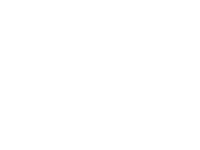

In [34]:
%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 10
ax = plt.gca(projection="3d")

# ne x 3 x 3
triangles = []
for j in range(len(C)):
    triangles.append(np.reshape(C[j], (3,3)))


# ax.add_collection(Poly3DCollection(triangles)
# Convert the list of triangles into a "flat" list of points
tri_points = list(chain.from_iterable(triangles))

# Get the X, Y and Z coordinates of each point
x, y, z = zip(*tri_points)


# Make list of triangle indices ([(0, 1, 2), (3, 4, 5), ...])
tri_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangles))]
# Make 3D axes
# Plot triangles
ax.plot_trisurf(x, y, z, triangles=tri_idx, linewidth=0.4,  edgecolor='black', color = 'green',
                antialiased=False, shade=True, alpha = 0.1)

ax.scatter(x,y,z, color = 'blue', s = 10)
#draw edges
# for i in range(A):
#     edge = np.copy(edges[i]);
#     x,u = np.copy(edge[0])
#     y,v = np.copy(edge[1])
#     z,w = np.copy(edge[2])
#     ax.plot(edge[0], edge[1], edge[2], color = 'b', linewidth=1)

for i in range(len(C)):
    ce = centroid (triangles[i])
    no = normal3 (triangles[i])
    ax.quiver(ce[0], ce[1], ce[2], .2*no[0], .2*no[1], .2*no[2], color = 'black')

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")
ax.grid(True)
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
    
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
    
for tick in ax.zaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

    
plt.show()     
plt.savefig("immersed2.png", bbox_inches='tight', dpi = 1200)


<IPython.core.display.Javascript object>


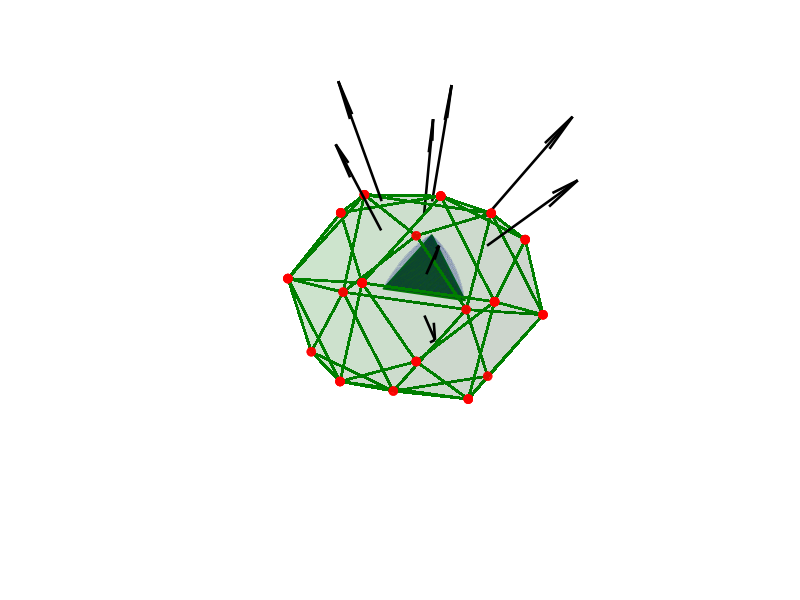

In [36]:
%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 10

# ne x 3 x 3
triangles = []
for j in range(len(B)):
    triangles.append(np.reshape(B[j], (3,3)))

tris_points = list(chain.from_iterable(triangles))
x, y, z = zip(*tris_points)
tris_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangles))]
ax = plt.figure().gca(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tris_idx, linewidth=1,  edgecolor='green', color = 'green',
                antialiased=False, shade=True, alpha = 0.1)


#just one of the triangles
I = 2
#triangle = [triangles[I]]
triangle = [mapt(triangles[I])]
tri_points = list(chain.from_iterable(triangle))
x1, y1, z1 = zip(*tri_points)
tri_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangle))]
ax.plot_trisurf(x1, y1, z1, triangles=tri_idx, linewidth=1,  edgecolor='green', color = 'green',
                antialiased=False, shade=True, alpha = 0.9)

for i in range(8):
    ce = centroid (triangles[i])
    no = normal3 (triangles[i])
    ax.quiver(ce[0], ce[1], ce[2], 1.2*no[0], 1.2*no[1], 1.2*no[2], color = 'black')



triangle = divide(triangles[I], 6)
tri_points = list(chain.from_iterable(triangle))
x1, y1, z1 = zip(*tri_points)
tri_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangle))]
ax.plot_trisurf(x1, y1, z1, triangles=tri_idx,  color = 'blue',
                antialiased=False, shade=True, alpha = 0.05)

ax.scatter(x,y,z, color = 'red')
ax.axis('off')
plt.show()     


#plt.savefig("simplex3D.eps",bbox_inches='tight')
plt.savefig("simplex3D.png", bbox_inches='tight', dpi = 1200)

    